# <font color='green'> Advertising Prediction

There are sales figures according to TV, Radio and Newspaper advertisements.

You will search for the answer to the question of how much will my sales figures increase if I invest in TV, radio and newspaper separately and you will find which advertising method is more successful. 

This dataset contains advertising expenditures and corresponding sales figures for a set of products. Each row represents data for a different product or advertisement campaign, with columns capturing the amount spent on different types of media (TV, Radio, and Newspaper) and the resulting sales.
### <font color="green"> Columns
- **TV**: The budget allocated to TV advertising for that campaign (in thousands of dollars).
- **Radio**: The budget allocated to Radio advertising for that campaign (in thousands of dollars).
- **Newspaper**: The budget allocated to Newspaper advertising for that campaign (in thousands of dollars).
- **Sales**: The resulting sales for that campaign (in thousands of units).


<img src='https://img.freepik.com/premium-vector/print-media-television-radio_944197-207.jpg?w=360'>

## <font color='green'> Requirements

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


## <font color='green'> Import Data

In [6]:
df=pd.read_csv('advertising.csv')

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## <font color='green'>EDA (Exploratory Data Analysis)

In [9]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [10]:
df.sample(3)

,TV,Radio,Newspaper,Sales
198,283.6,42.0,66.2,25.5
16,67.8,36.6,114.0,12.5
140,73.4,17.0,12.9,10.9


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [15]:
df.shape

(200, 4)

## <font color='green'> Data Visualization

<Axes: >

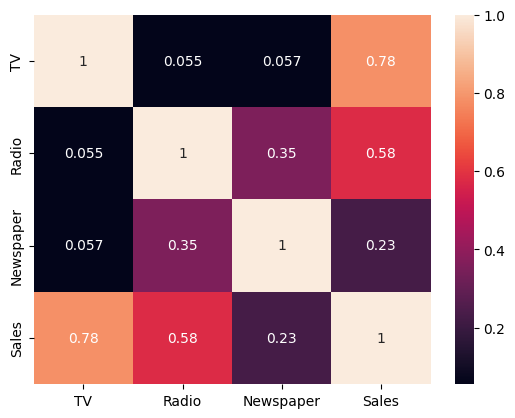

In [17]:
sns.heatmap(df.corr(),annot=True)

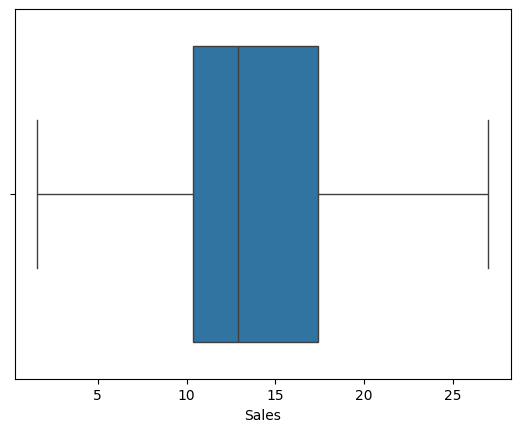

In [18]:
sns.boxplot(x=df['Sales']);

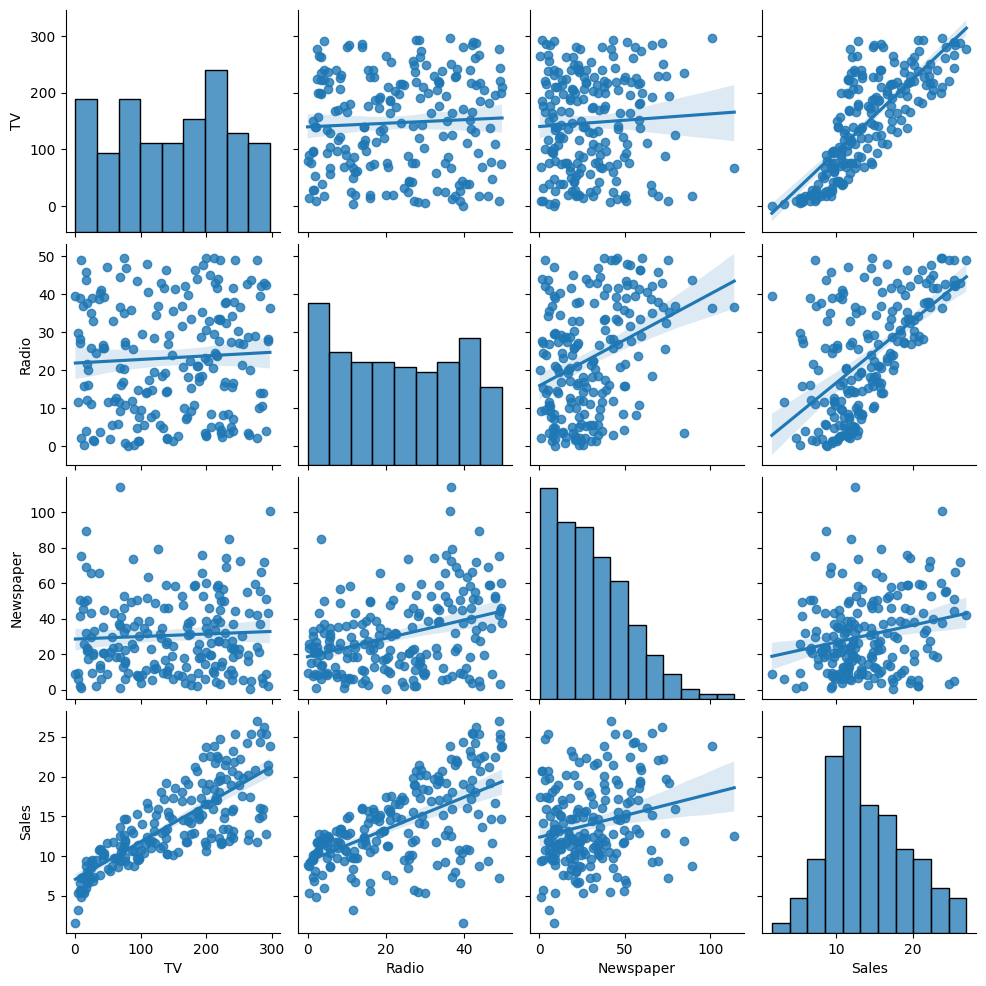

In [19]:
sns.pairplot(df,kind='reg')

<Axes: >

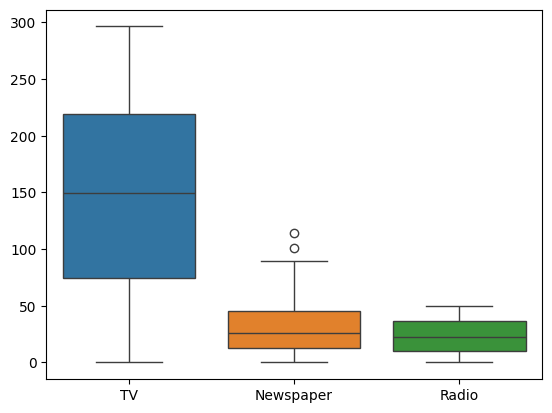

In [20]:
sns.boxplot([df['TV'],df['Newspaper'],df['Radio']]) # we can see that there is only 2 outlier values in newspaper category.

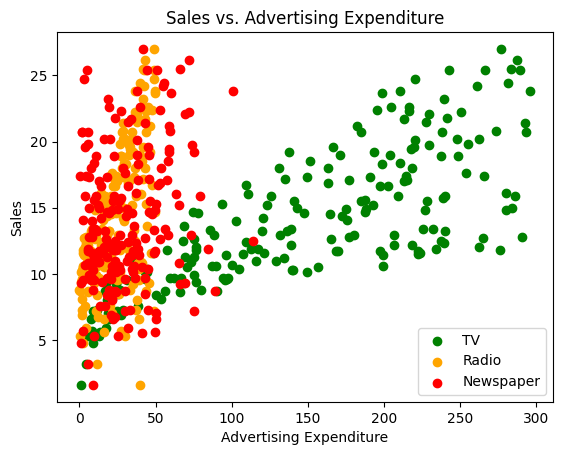

In [21]:
plt.scatter(df['TV'], df['Sales'], color='green', label='TV')
plt.scatter(df['Radio'],df['Sales'],color='orange',label='Radio')
plt.scatter(df['Newspaper'],df['Sales'],color='red',label='Newspaper')
plt.title('Sales vs. Advertising Expenditure')
plt.xlabel('Advertising Expenditure')
plt.ylabel('Sales')
plt.legend();

## <font color='green'> Feature Engineering

### <font color='green'> Outlier Analysis

In [24]:
outliers=df.quantile(q=.97,numeric_only=True)

In [25]:
df=df[(df['Newspaper']<outliers['Newspaper'])]

## <font color='green'> Modelling

In [27]:
def algo_test(x,y,plot=False):
    # Butun Modelleri tanimliyorum
    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    kn=KNeighborsRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()

    algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
    algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Bossting','KNeighborRegressor','DecisionTreeRegressor','XGBReggressor']

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

    r_squared=[]
    rmse=[]
    mae=[]

    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)

    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        r_squared.append(r2_score(y_test,p))
        rmse.append(mean_squared_error(y_test,p)**0.5)
        mae.append(mean_absolute_error(y_test,p))

    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae

    r_table=result.sort_values('R_Squared',ascending=False)
    if plot:
        best_model = algos[r_squared.index(max(r_squared))]
        y_pred = best_model.predict(x_test)
        
        plt.figure(figsize=(10,6))
        plt.plot(y_test.reset_index(drop=True),label='Acutal',color='green',linestyle='--')
        plt.plot(pd.Series(y_pred),label='Predicted',color='red',linestyle='--')
        plt.xlabel('Predicted Sales')
        plt.ylabel('Actual Sales')
        plt.title('Actual vs Predicted Sales for Best Model')
        plt.legend()
        plt.show()
    return r_table

In [28]:
x=df.drop('Sales',axis=1)
y=df[['Sales']]

In [29]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [30]:
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


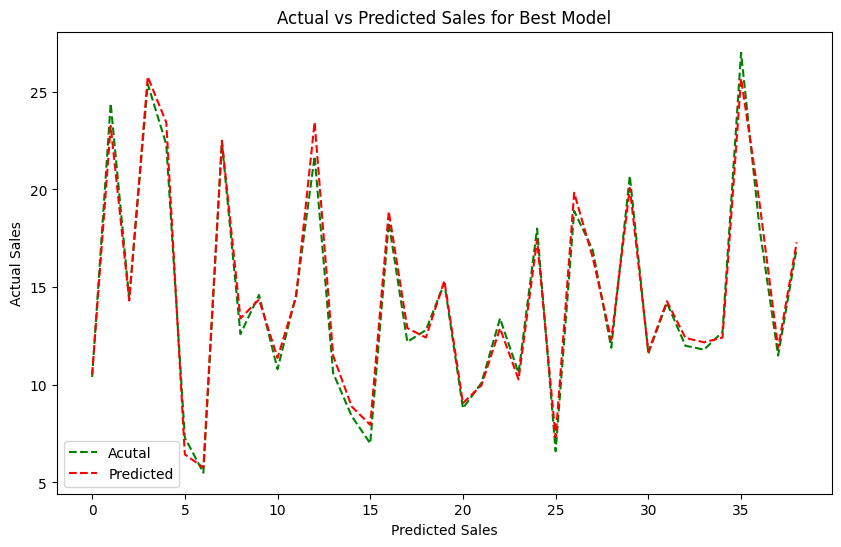

,R_Squared,RMSE,MAE
Gradient Bossting,0.984314,0.668991,0.538677
XGBReggressor,0.984313,0.669011,0.559495
DecisionTreeRegressor,0.964655,1.004222,0.771795
Extra Tree,0.955874,1.122040,0.928205
KNeighborRegressor,0.929284,1.420437,0.949744
Linear,0.899526,1.693127,1.267680
Ridge,0.899522,1.693161,1.267706
ElasticNet,0.897725,1.708236,1.277979
Lasso,0.896491,1.718508,1.284320


In [31]:
algo_test(x,y,plot=True)

## <font color='green'>Feature Importance

In [33]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr.fit(x_train,y_train)

LinearRegression()

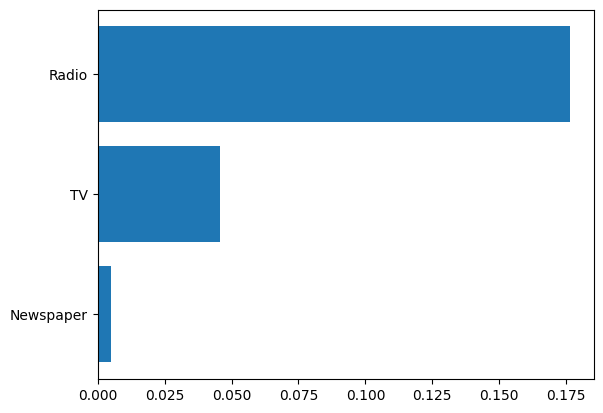

In [34]:
feature_importance=pd.DataFrame({'Feature':x_train.columns,'Coefs':lr.coef_[0]})
feature_importance=feature_importance.sort_values(by='Coefs',ascending=False)
plt.barh(feature_importance['Feature'],feature_importance['Coefs'])
plt.gca().invert_yaxis()

## <font color='green'>Advertising Investment Impact on Sales

### <font color='green'>1. How much does each advertising type increase sales?

The coefficients in the chart show the impact of a 1-unit investment increase:

- **<font color='red'>Radio**: Highest impact on sales. Each additional unit in radio investment increases sales the most.
- **<font color='red'>TV**: Moderate impact. Increases sales, but less than radio.
- **<font color='red'>Newspaper**: Lowest impact. Adds the least to sales.

### <font color='green'>2. Which advertising method is most successful?

Based on the coefficient sizes:

- **<font color='orange'>Most Successful**: **<font color='red'>Radio** (highest sales impact)
- **<font color='orange'>Second**: **<font color='red'>TV** (medium impact)
- **<font color='orange'>Least Successful**: **<font color='red'>Newspaper** (lowest impact)

**<font color='green'>Conclusion**: Allocate more budget to **Radio**, then **TV**, and finally **Newspaper** to maximize sales.
